<a href="https://colab.research.google.com/github/Ridwanr989/bigdata-ai/blob/main/DataAsuransi_Perkiraan_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Understanding**

Banyak faktor yang mempengaruhi berapa banyak biaya asuransi kesehatan yang harus dibayar. Ada baiknya untuk memiliki pemahaman terkait faktor-faktor tersebut.

* age: Usia penerima.
* sex: *Gender* penerima asuransi, *female*, *male*.
* bmi (*Body Mass Index*): Memberikan pemahaman tentang tubuh, berat badan yang relatif tinggi atau relatif rendah terhadap tinggi badan.  Indeks objektif berat badan (kg/m^2) menggunakan rasio tinggi terhadap berat badan, idealnya 18,5 hingga 24,9.
* children: Jumlah anak yang ditanggung oleh asuransi kesehatan atau jumlah tanggungan.
* smoker: Perokok atau bukan perokok.
* region: Wilayah penerima di AS, *northeast*, *southeast*, *southwest*, *northwest*.
* charges: Biaya medis individu yang ditagih oleh asuransi kesehatan.


### Exploratory Data Analysis (EDA)

**Load Dataset**

In [1]:
import pandas as pd #dataframe
import numpy as np #komputasi numerik
#visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures #preprocessing data
#membagi data
from sklearn.model_selection import train_test_split
#load model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
#metrics
from sklearn import metrics

Membaca dataset menggunakan library pandas.

Dataset yang telah diekstrak sebelumnya, untuk dapat ditampilkan dalam bentuk dataframe maka dapat menggunakan pandas dengan fungsi `read_csv` untuk membaca file csv.


In [2]:
df = pd.read_csv("insurance.csv")

Menggunakan fungsi `head()` untuk menampilkan beberapa data. Berguna untuk mendapatkan sebuah gambaran sekilas akan data.

Secara default menampilkan 5 data.

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Mengecek secara bentuk data dalam hal ini untuk mengetahui berapa banyaknya data (row) dan banyaknya kolom pada dataset dengan perintah `shape`

In [4]:
df.shape

(1338, 7)

Terdapat 1338 baris data atau banyaknya sample data dan terdapat 7 kolom atau feature pada dataset yang digunakan saat ini.

**Analisa Statistika Deskriptif**


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Didapatkan beberapa hasil berupa:
* Banyaknya sample 1338.
* rata-rata umur 39, memiliki bmi 30, jumlah anak 1 dan biaya 13270 yang harus dibayarkan.
* tertua dengan umur 64 tahun dan termuda ada 18 tahun.


**Dataset Info**

Menggunakan fungsi `info()` untuk mendapatkan informasi berupa type data dan mengecek data null.

Jika dilihat tidak terdapat data null dan terdapat beberapa tipe data object (string) dalam hal ini pada fitur sex, smoker dan region.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Mengecek region-region apa saja yang terdapat pada dataset dengan menggunakan fungsi `unique()`.

Jika dilihat terdapat 4 region.

In [7]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Memastikan data tidak ada yang null.

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Visualisasi**

Melakukan visualisasi data pada data tipe numerik.

<Axes: xlabel='age'>

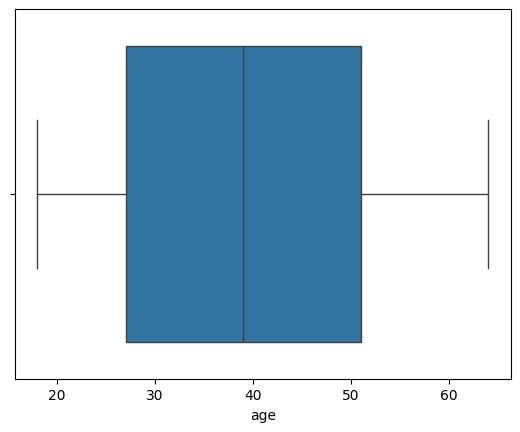

In [9]:
sns.boxplot(x=df['age'])

Jika dilihat pada visualisasi boxplot `age`, umur termudah berada di umur 18 tahun, rata-rata 39 tahun dan tertua 64 tahun.

<Axes: xlabel='bmi'>

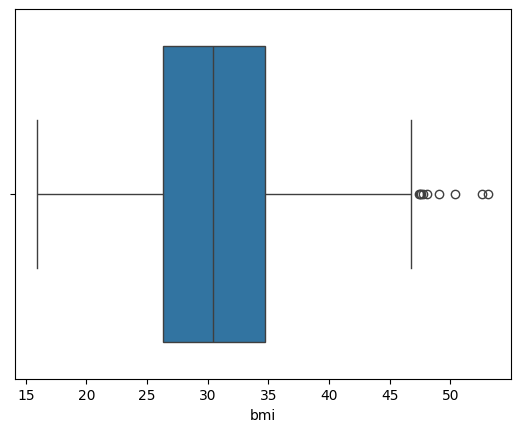

In [10]:
sns.boxplot(x=df['bmi'])

Untuk bmi dapat dilihat bahwa terdapat beberapa data outlier dan bmi terendah 15, rata-rata bmi 30 dan bmi tertinggi 53.

<Axes: xlabel='children'>

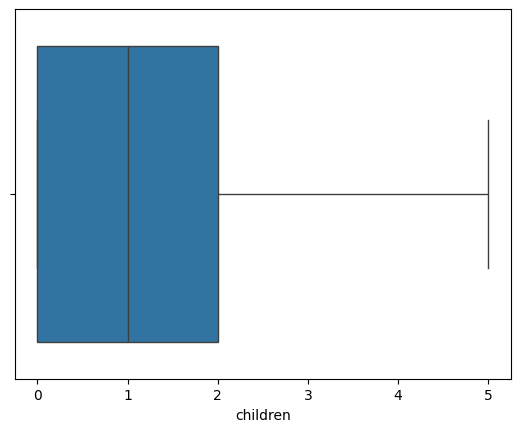

In [11]:
sns.boxplot(x=df['children'])

Jika dilihat pada visualiasi fitur anak. Rata-rata jumlah anak 1 dan paling banyak 5 namun kebanyakan tidak memiliki anak.

###Univariate Analysis

**Kategorical**

sex
male      676
female    662
Name: count, dtype: int64


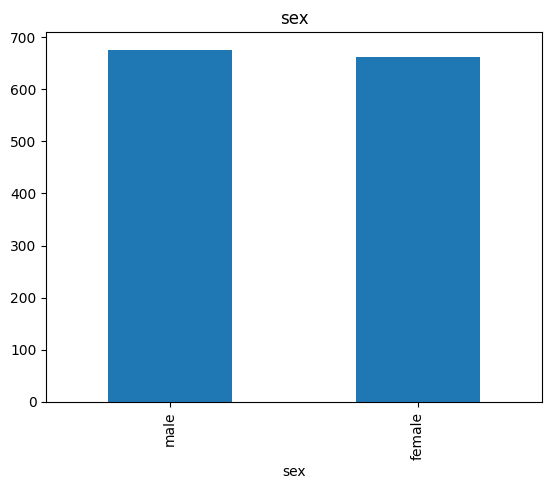

In [12]:
print(df['sex'].value_counts())
df['sex'].value_counts().plot(kind='bar', title='sex');

Jika dilihat hasil visualisasi dari jenis kelamin pada dataset, jumlah sample dari laki-laki dan perempuan hampir sama.

smoker
no     1064
yes     274
Name: count, dtype: int64


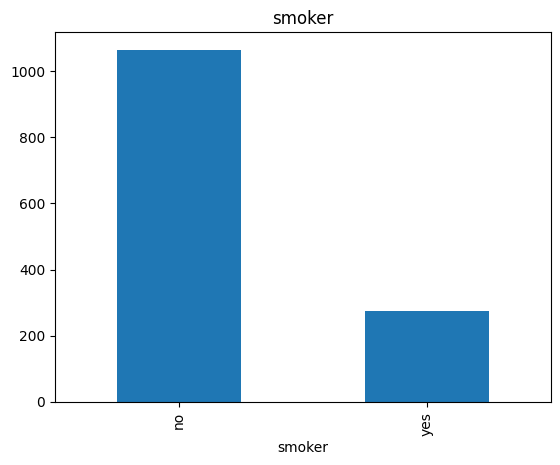

In [13]:
print(df['smoker'].value_counts())
df['smoker'].value_counts().plot(kind='bar', title='smoker');

Jika dilihat dari hasil visualisasi, jumlah yang tidak merokok lebih banyak dibandingkan dengan jumlah perokok.

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


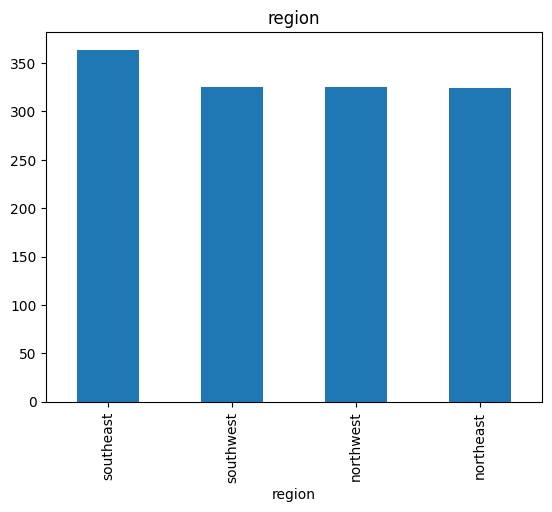

In [14]:
print(df['region'].value_counts())
df['region'].value_counts().plot(kind='bar', title='region');

Jadi secara keseluruhan biaya asuransi tertinggi ada di region Southeast dan terendah di region Southwest.

**Numerik**

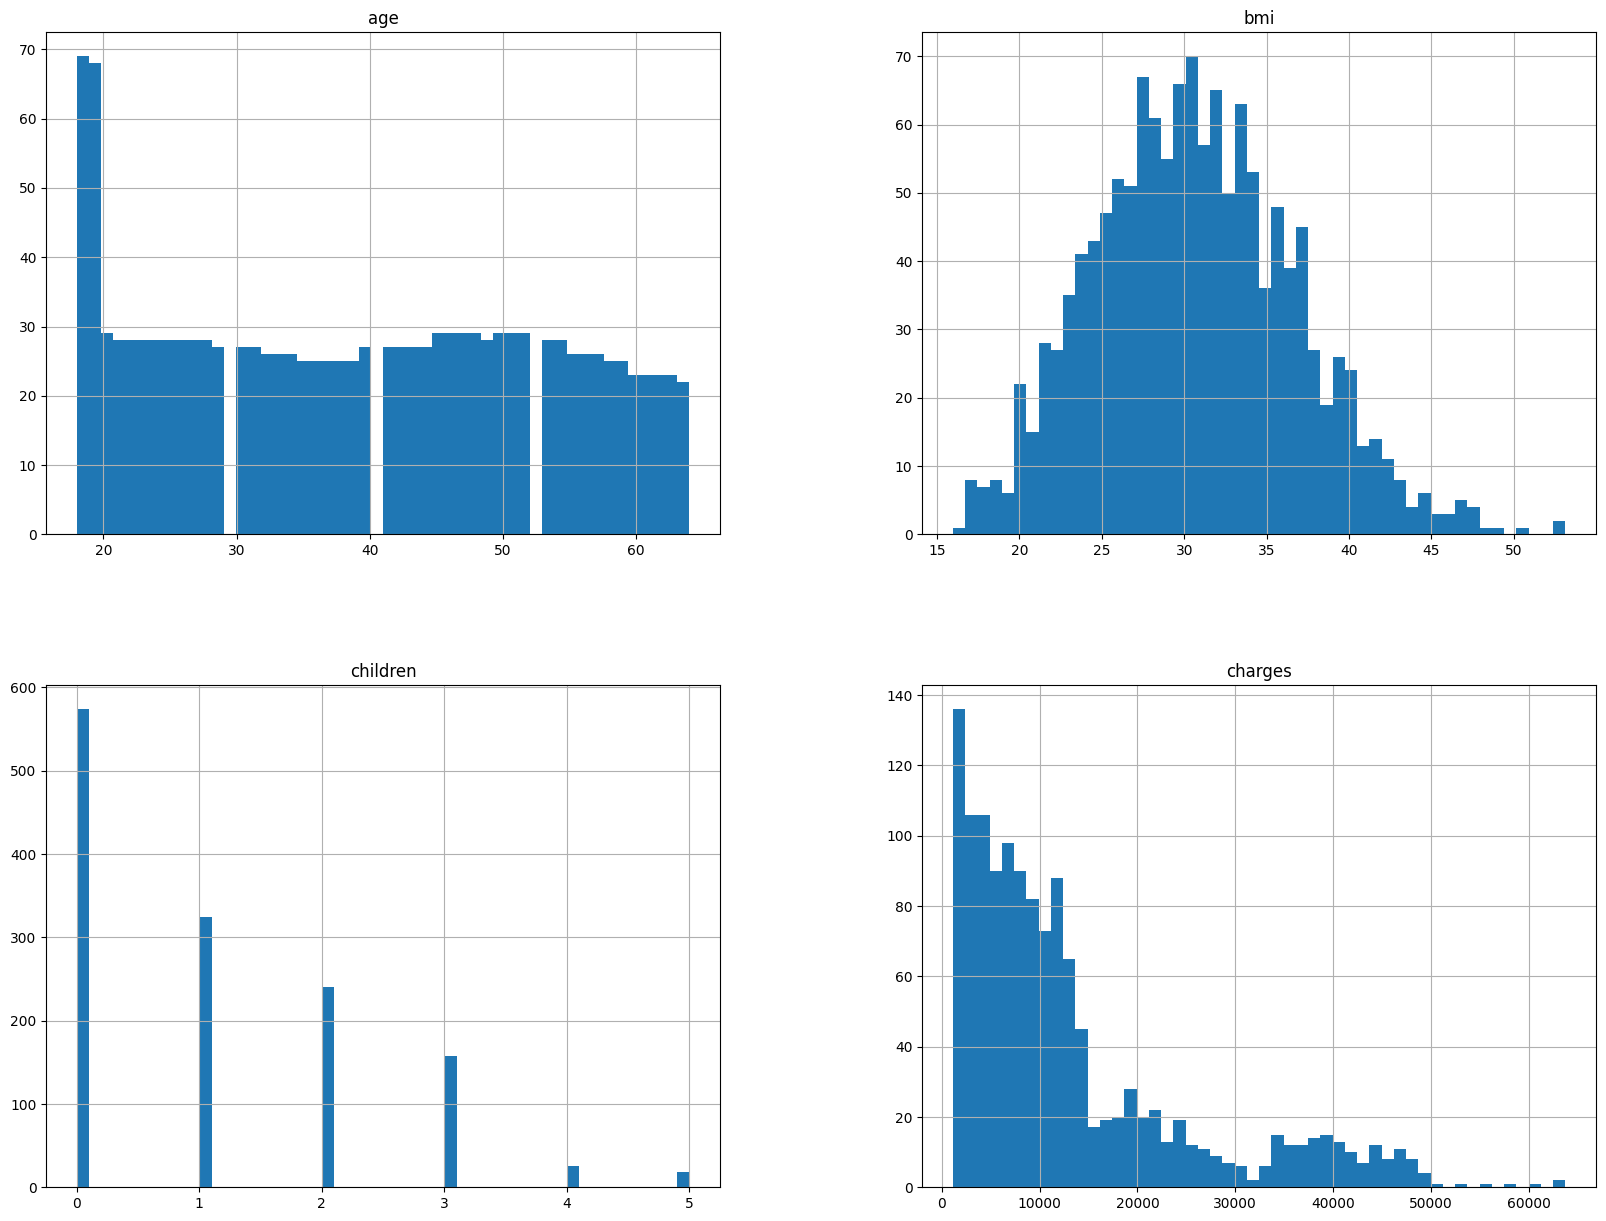

In [15]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Jika dilihat pada fitur `charges` atau lebih tepatnya label atau target, datanya distribusi condong kekanan (right-skewed).

###Multivariate Analysis

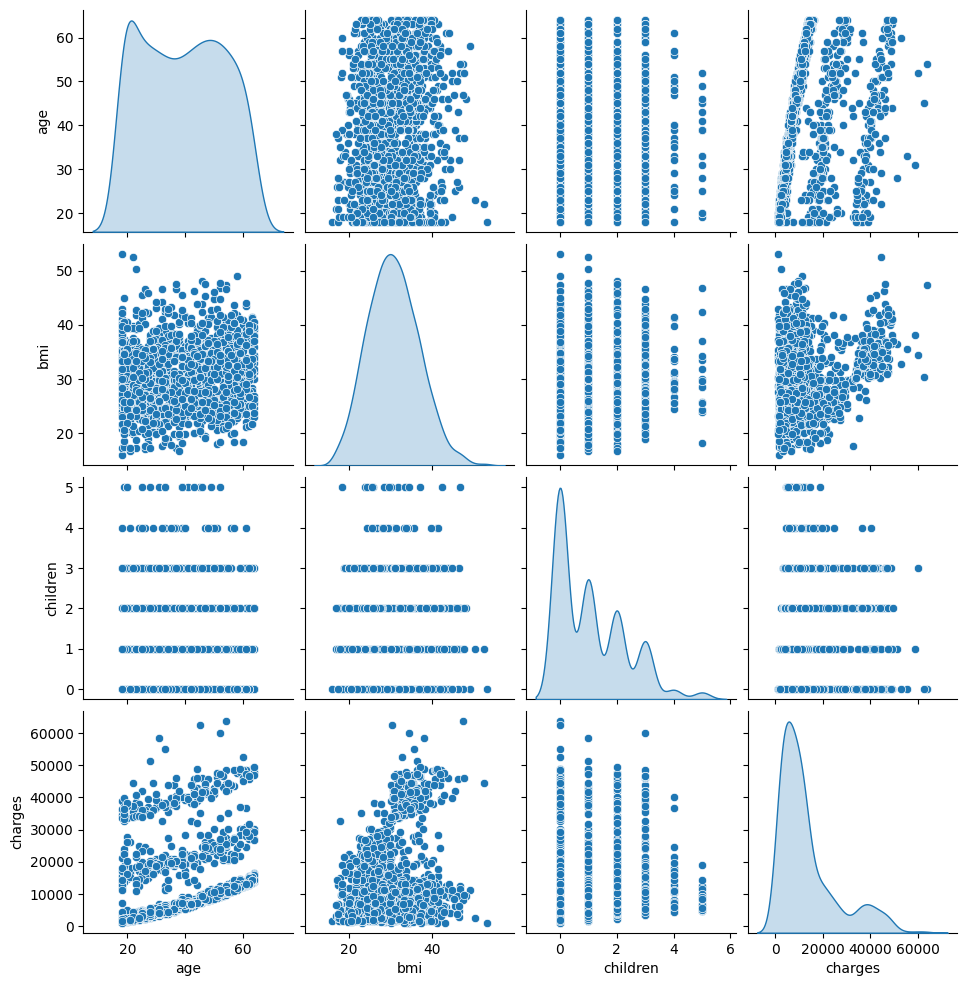

In [16]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

Dapat diperhatikan fitur-fitur yang terdapat pada dataset yang digunakan terhadap target `charges` tidak memiliki hubungan linier.

Visualisasi terdahap tipe data `object` terhadap target.

<ipython-input-17-58f5ce236fc6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-17-58f5ce236fc6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-17-58f5ce236fc6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")


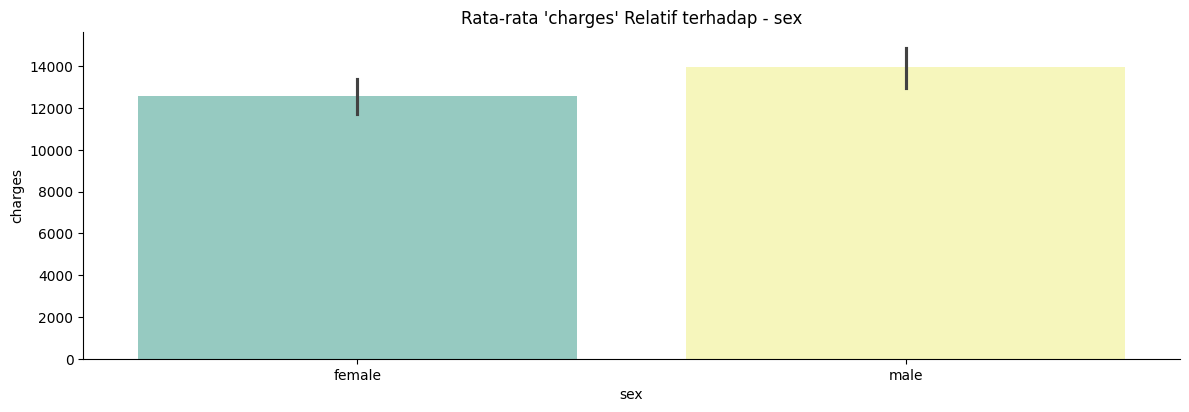

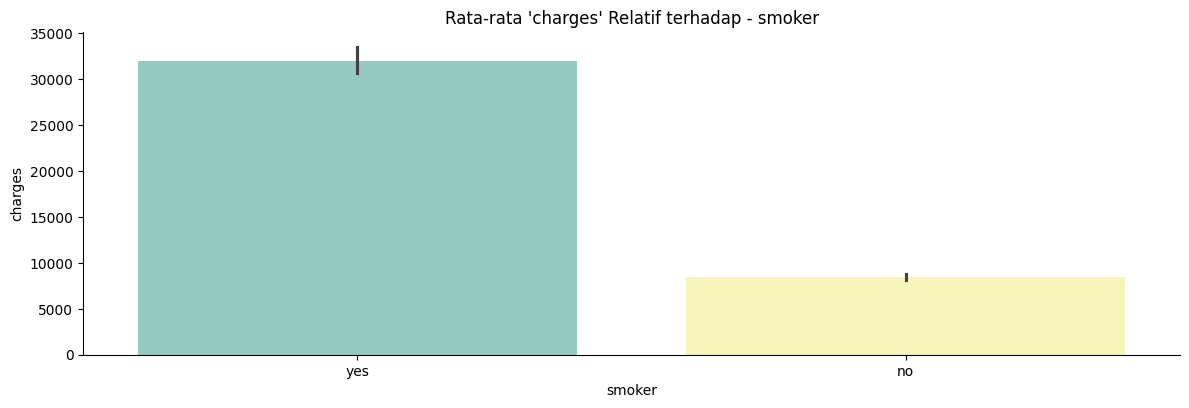

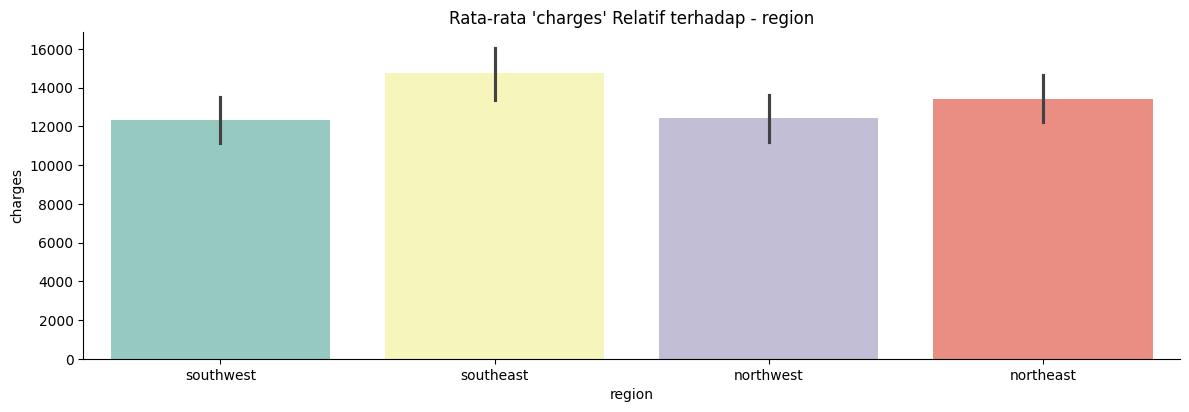

In [17]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'charges' Relatif terhadap - {}".format(col))

Jika dilihat
* Faktor pada fitur sex tidak berpengaruh jauh.
* Faktor perokok berpengaruh terhadap biaya.
* Region southeast dengan charges yang dibayar tinggi.

Mempertimbangkan faktor-faktor tertentu (sex, smoker, children) mari kita lihat bagaimana perubahannya berdasarkan region.

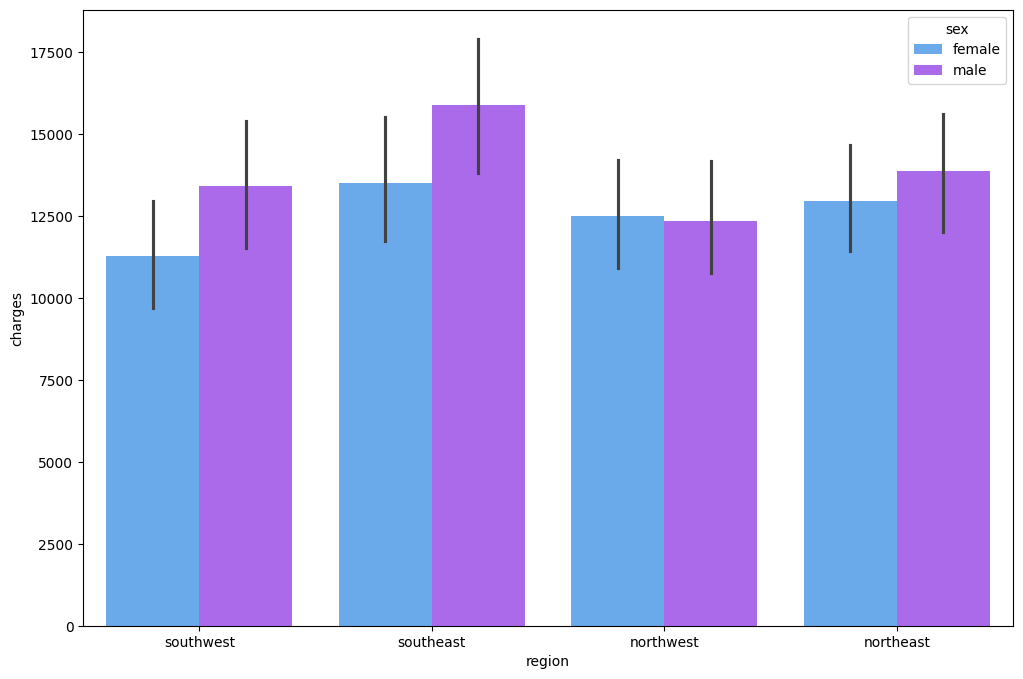

In [18]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

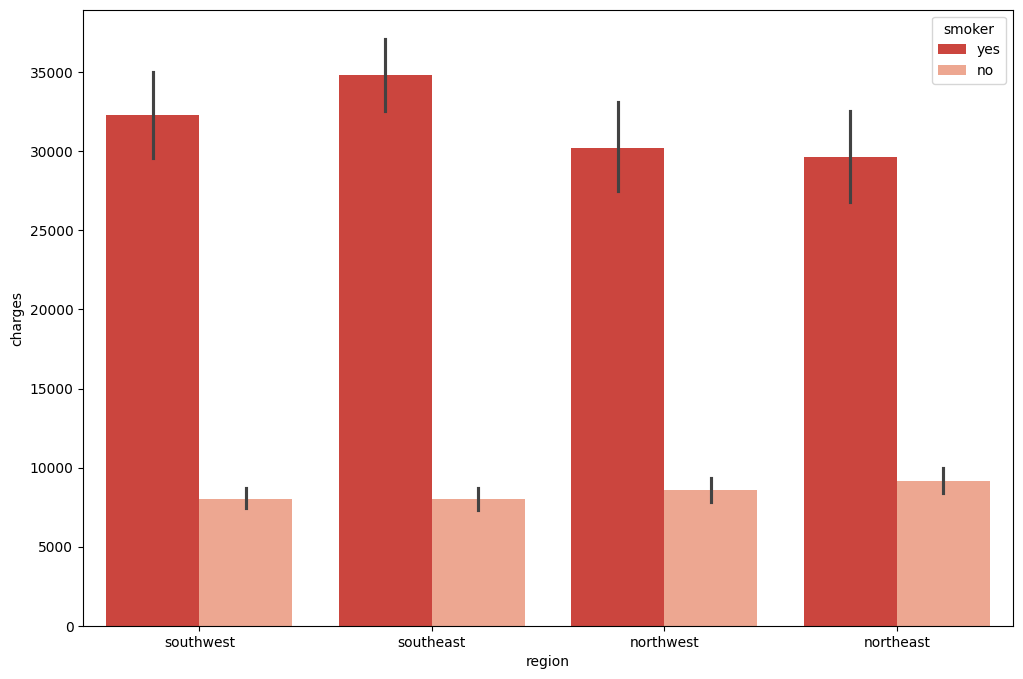

In [19]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

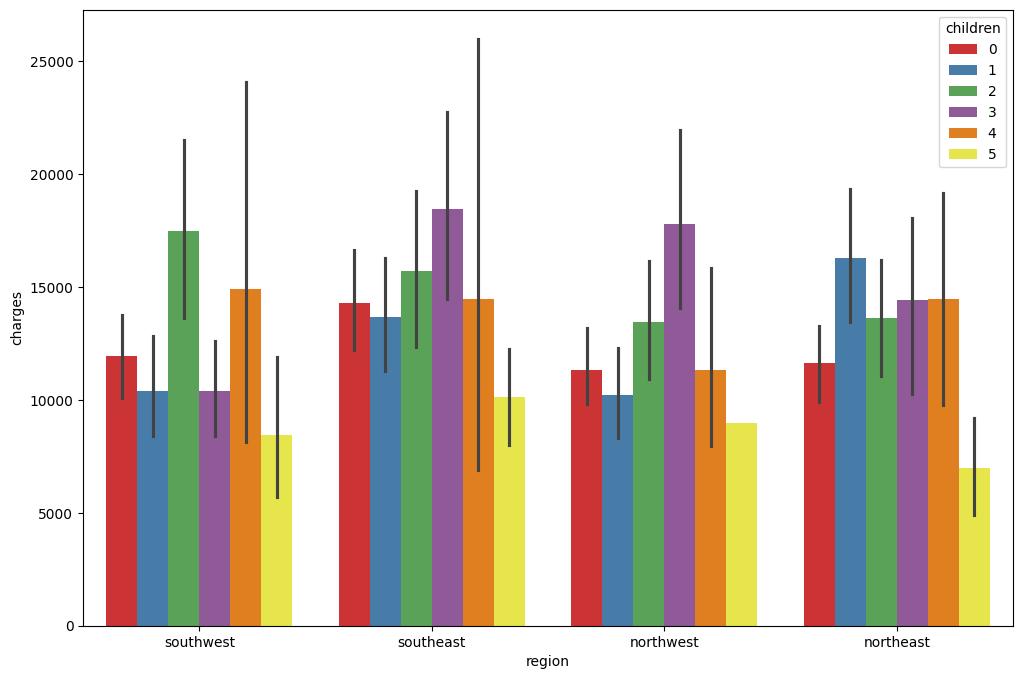

In [20]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

Seperti yang bisa dilihat dari barplots ini biaya `charges` tertinggi akibat merokok masih di Southeast tetapi terendah di Northeast. Orang-orang di Southwest umumnya merokok lebih banyak daripada orang-orang di Northeast tetapi orang-orang di Northeast memiliki biaya `charges` lebih tinggi berdasarkan jenis kelamin `sex` daripada di Southwest dan Northwest secara keseluruhan dan orang-orang dengan memiliki anak cenderung memiliki biaya `charges` medis yang lebih tinggi secara keseluruhan juga.

Analisa biaya pengobatan menurut age, bmi dan children menurut faktor smoker :

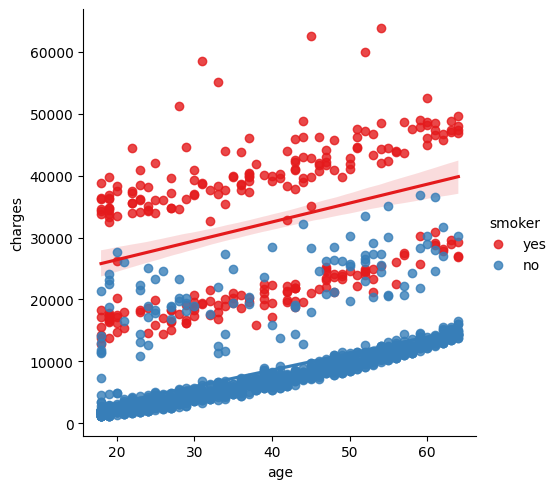

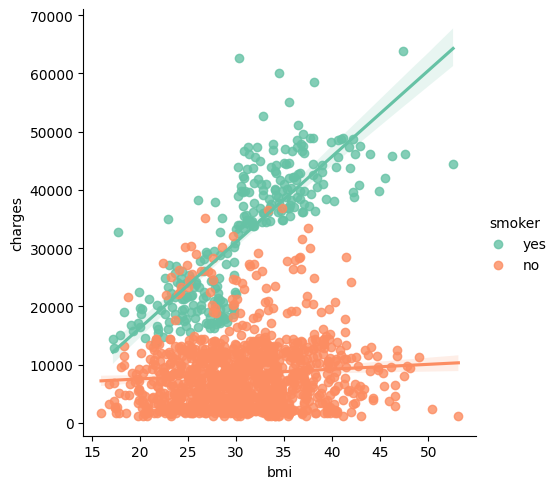

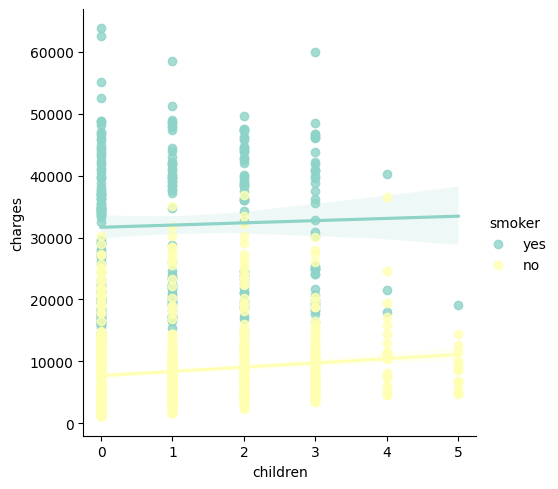

In [21]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

Merokok memiliki dampak tertinggi pada biaya medis, meskipun biayanya meningkat seiring bertambahnya usia, bmi, dan jumlah anak-anak.

## Data Preparation

**Konversi Dataset**

Seperti yang telah diketahui data dari fitur sex, smoker dan region berupa kategorikal, maka perlu melakukan konversi data kategorikal ke data numerik agar dapat diolah. Sebelum diubah ke numerik maka perlu di konversi ke tipe data kategorikal terlebih dahulu. Untuk itu bisa menggunakan `astype` untuk mengkonversikan tipe data.

In [22]:
##konversi tipe data object ke categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

Dapat dilihat tipe data yang sebelumnya object telah berhasil dikonversikan ke category dengan menggunakan `dtypes`  

**One Hot Encoding**

Selanjutnya melakukan one hot encoding dengan menggunakan `one hot encoding`.
One hot encoding mengubah setiap nilai dalam kolom menjadi kolom baru yang bernilai 0 atau 1.

In [23]:
#preprocessing
#Convert kolom
#Karena pada kolom sex,smoker dan region berupa variabel text/categorial maka harus dilakukan kategorisasi atau encode

#kolom smoker
df = pd.concat([df, pd.get_dummies(df['smoker'], prefix='smoker')],axis=1)
#kolom sex
df = pd.concat([df, pd.get_dummies(df['sex'], prefix='sex')],axis=1)
#kolom region
df = pd.concat([df, pd.get_dummies(df['region'], prefix='region')],axis=1)
df.drop(['smoker','sex','region'], axis=1, inplace=True)

df.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
smoker_no              bool
smoker_yes             bool
sex_female             bool
sex_male               bool
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

In [24]:
df.head()

,age,bmi,children,charges,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,True,False,False,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,False,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,False,True,False,True,False,False


**Matrik Korelasi**


Menggunakan fungsi yang telah disediakan oleh seaborn untuk melihat korelasi antar variabel atau fitur. Lebih tepatnya mengecek korelasi fitur terdahap label atau target.

Text(0.5, 1.0, 'Correlation Matrix')

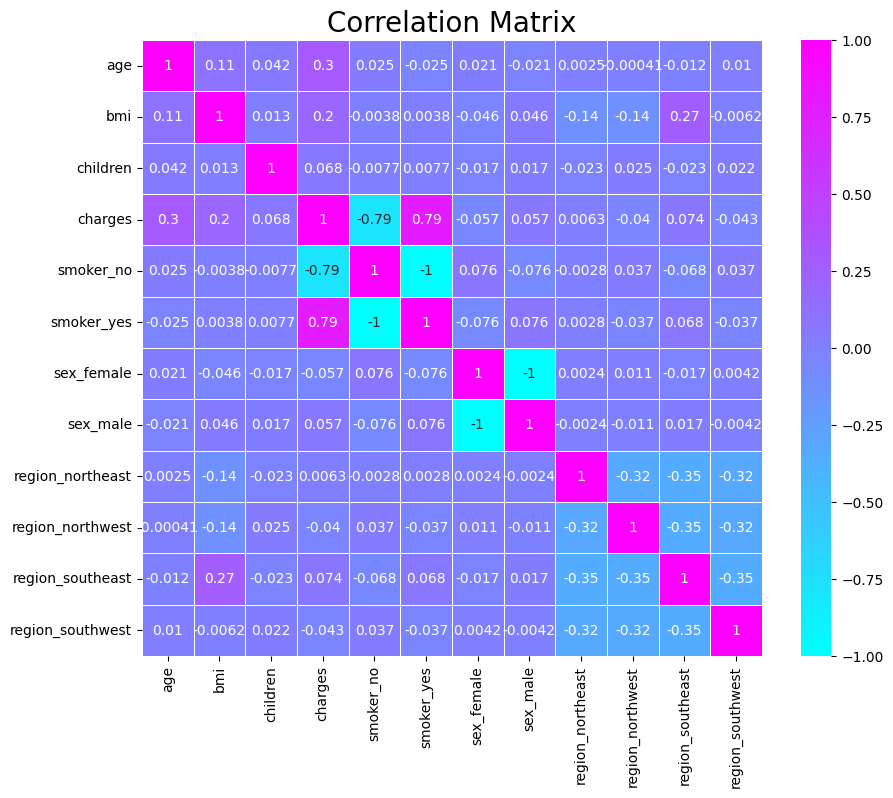

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df.corr(), annot=True, cmap='cool', linewidths=0.5, )
plt.title("Correlation Matrix", size=20)

Jika dilihat hasil visualisasinya maka tidak ada korelasi kecuali `smoker`.

**Train-Test-Split**

Membagi dataset menjadi data latih (train) dan data uji (test) merupakan hal yang harus dilakukan sebelum membuat model. Mempertahankan sebagian data yang ada untuk menguji seberapa baik generalisasi model terhadap data baru.

In [26]:
X = df.drop(['charges'], axis=1)
y = df['charges']

Membagi dataset dengan 80:20. Jadi 80% untuk data latih dan 20% data uji dengan `random_state = 0` agar data yang dibagi tidak teracak.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 11) (268, 11) (1070,) (268,)


Perlu menskalakan kolom-kolom yang dibutuhkan. Perbedaan skala dapat menyebabkan kendala dengan estimator `euclidean distance`.

StandardScaler menghilangkan mean (terpusat pada 0) dan menskalakan ke variansi (deviasi standar = 1), dengan asumsi data terdistribusi normal (gauss) untuk semua fitur.

In [28]:
# feature scaling
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Modelling

**Fungsi Evaluasi Model**

Dibuat sebuah fungsi evaluasi model untuk menghasilkan output berupa metric MSE, RMSE, dan R2. Fungsi evaluasi model ini akan digunakan dalam mengevaluasi beberapa model yang akan digunakan.

Output yang dihasilkan pada fungsi evaluasi model berupa metric dari hasil training dan validasi model.

In [29]:
def evaluate_model(model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,print_metric=True):
  y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)
  mse_train = mean_squared_error(y_train, y_pred_train)
  mse_test = mean_squared_error(y_test, y_pred_test)
  rmse_train, rmse_test = np.sqrt(mse_train), np.sqrt(mse_test)
  r2_train, r2_test = r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)
  if print_metric:
        print(f'''On training set:\nMSE: {mse_train}    RMSE: {rmse_train}    r2: {r2_train}\n
=====================================\nOn test set:\nMSE: {mse_test}    RMSE: {rmse_test}    r2: {r2_test}''')
  return mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test

Pada tahap ini, akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Selain itu menggunakan fine tuning untuk mencari paramater yang cocok dalam pengembangan model.

Dalam kasus kali ini, model harus menggunakan algoritma regresi karena hasil prediksi yang diinginkan adalah memprediksi nilai dari setiap data yang baru.

Algoritma yang digunakan, yaitu:
* Linear Regression
* Polynomial Regression
* Random Forest

**Model Linear Regression**


In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

_ ,_ ,_ ,mse, rmse, r2 = evaluate_model(lin_reg)

On training set:
MSE: 37701533.128629126    RMSE: 6140.157418880165    r2: 0.7370262574551634

On test set:
MSE: 31827950.22952384    RMSE: 5641.62655885019    r2: 0.7999876970680433


Jika dilihat dari hasil training menggunakan model linear regression, metric atau lebih tepatnya nilai `R2` menghasilkan 0.73 yang artinya jika nilai r2 semakin mendekati 1 maka semakin baik model yang dihasilkan dan nilai `RMSE` rendah menunjukkan bahwa variasi nilai yang dihasilkan oleh suatu model prakiraan mendekati variasi nilai obeservasinya. RMSE menghitung seberapa berbedanya seperangkat nilai. Semakin kecil nilai RMSE, semakin dekat nilai yang diprediksi dan diamati. Begitu juga dengan nilai `MSE`.

Kode dibawah digunakan untuk menyimpan evaluasi model data validasi (data uji) yang akan dibandingkan dengan model lainnya berdasarkan metrik MSE, RMSE dan R2.

In [31]:
results_df = pd.DataFrame([['Linear Regression', mse,rmse,r2]], columns=['Model', 'MSE', 'RMSE', 'R^2'])
results_df

,Model,MSE,RMSE,R^2
0,Linear Regression,3.182795e+07,5641.626559,0.799988


**Polynomial Regression**

Menerapkan konsep fine tuning untuk mencari parameter yang cocok (fit) untuk model.

In [32]:
degree = [2,3,4,5]
results = []
for d in degree:
    poly_feat = PolynomialFeatures(degree=d)
    X_poly = poly_feat.fit_transform(X)
    Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)
    poly_reg = LinearRegression()
    poly_reg.fit(Xp_train, yp_train)

    mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(poly_reg, Xp_train, yp_train, Xp_test, yp_test,print_metric=False)

    results.append([d, mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test])
poly_results = pd.DataFrame(results, columns=['degree', 'mse_train', 'rmse_train', 'r2_train', 'mse_test', 'rmse_test', 'r2_test'])
poly_results

,degree,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test
0,2,5.299257e+07,7279.599847,0.630369,4.388588e+07,6624.642034,0.724214
1,3,2.418883e+07,4918.214557,0.831279,2.459227e+07,4959.058977,0.845458
2,4,1.905753e+07,4365.493252,0.867071,2.386682e+07,4885.368370,0.850017
3,5,1.376964e+07,3710.745896,0.903955,9.815951e+07,9907.547971,0.383149


Jika dilihat dari hasil fine tuning maka `degree` yang akan digunakan adalah `degree 3` (derajat 3) karena derajat yang lebih tinggi menyebabkan overfitting pada training set.


Membuat model polynomial regression dengan degree 3.

In [33]:
#memilih degree 3
polynomial_model = PolynomialFeatures(degree=3)
polynomial_model = LinearRegression()
polynomial_model.fit(Xp_train, yp_train)
mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(polynomial_model, Xp_train, yp_train, Xp_test, yp_test,print_metric=True)

On training set:
MSE: 13769635.104683125    RMSE: 3710.7458960003078    r2: 0.9039547685076607

On test set:
MSE: 98159506.79557028    RMSE: 9907.547970894226    r2: 0.3831488089159054


**Random Forest**

Menerapkan konsep fine tuning untuk mencari parameter yang cocok (fit) untuk model. Adapun parameter yang dicari adalah `n_estimators` dan `max_leaf_nodes`.

In [34]:
n_estimators = [10, 30, 100, 300, 1000, 3000]
max_leaf_nodes = [10, 30, 50, 75, 100]
results = []
for est in n_estimators:
    for n_nodes in max_leaf_nodes:
        for_reg = RandomForestRegressor(n_estimators=est, max_leaf_nodes=n_nodes, random_state=0)
        for_reg.fit(X_train, y_train)
        mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(for_reg,print_metric=False)
        results.append([est, n_nodes, mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test])
for_results_df = pd.DataFrame(results, columns=['n_estimators', 'n_nodes', 'mse_train', 'rmse_train', 'r2_train', 'mse_test', 'rmse_test', 'r2_test'])
for_results_df

,n_estimators,n_nodes,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test
0,10,10,2.015109e+07,4488.996587,0.859443,1.782335e+07,4221.771537,0.887995
1,10,30,1.540936e+07,3925.476138,0.892517,1.697982e+07,4120.657115,0.893296
2,10,50,1.189238e+07,3448.533047,0.917049,1.843576e+07,4293.687847,0.884147
3,10,75,9.037475e+06,3006.239280,0.936962,1.893812e+07,4351.794485,0.880990
4,10,100,6.994195e+06,2644.653967,0.951214,2.001638e+07,4473.967006,0.874214
5,30,10,2.028045e+07,4503.381934,0.858541,1.819100e+07,4265.091328,0.885685
6,30,30,1.502875e+07,3876.692760,0.895172,1.735470e+07,4165.896885,0.890940
7,30,50,1.151963e+07,3394.057669,0.919649,1.785342e+07,4225.330345,0.887806
8,30,75,8.382044e+06,2895.176013,0.941534,1.838533e+07,4287.811484,0.884463
9,30,100,6.274216e+06,2504.838608,0.956236,1.940916e+07,4405.582694,0.878030


Mencari nilai maksimum R2 dari hasil fine tuning.

In [35]:
max_r2 = max(for_results_df['r2_test'])
for_results_df[for_results_df['r2_test']==max_r2]

,n_estimators,n_nodes,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test
1,10,30,1.540936e+07,3925.476138,0.892517,1.697982e+07,4120.657115,0.893296


Mencari nilai minimum R2 dari hasil fine tuning.


In [36]:
min_rmse = min(for_results_df['rmse_test'])
for_results_df[for_results_df['rmse_test']==min_rmse]

,n_estimators,n_nodes,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test
1,10,30,1.540936e+07,3925.476138,0.892517,1.697982e+07,4120.657115,0.893296


Maka didapatkan parameter yang cocok untuk model Random Forest adalah `n_estimators = 3000` dan `max_leaf_nodes = 10`

In [37]:
#memilih estimator 3000 and nodes 10
randomforest_model = RandomForestRegressor(n_estimators=3000, max_leaf_nodes=10, random_state=0)
randomforest_model.fit(X_train, y_train)
mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(randomforest_model,print_metric=True)

On training set:
MSE: 20029775.580781113    RMSE: 4475.4637280153565    r2: 0.8602893673092727

On test set:
MSE: 17157171.627343927    RMSE: 4142.121633576678    r2: 0.8921813882377928


## Evaluation

Model yang digunakan adalah regresi, maka untuk metrik yang digunakan untuk melakukan evaluasi model, yaitu:
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* R2

**- Mean Squared Error (MSE)**

Mean Squared Error (MSE) adalah Rata-rata Kesalahan kuadrat diantara nilai aktual dan nilai prediksi. Metode Mean Squared Error secara umum digunakan untuk mengecek estimasi berapa nilai kesalahan pada prediksi. Nilai Mean Squared Error yang rendah atau nilai mean squared error mendekati nol menunjukkan bahwa hasil prediksi sesuai dengan data aktual dan bisa dijadikan untuk perhitungan prediksi di periode mendatang. Metode Mean Squared Error biasanya digunakan untuk mengevaluasi metode pengukuran dengan model regressi.


Untuk menerapkannya ke dalam kode ada 2 cara:
1. Menggunakan library dari sklearn
Dapat menggunakan secara langsung dari library sklearn untuk mendapatkan nilai MSE dengan cara:
* Load library `from sklearn.metrics import mean_squared_error`
* Tentukan nilai Y (nilai sebenarnya) dan nilai Y' (nilai prediksi).
* Memanggil fungsi `mean_squared_error(Y_true,Y_pred)` yang dimana menerima paramater input Y_true sebagai nilai sebenarnya dan Y_pred sebagai nilai prediksi.
2. Menggunakan library numpy
* Load library `import numpy as np`
* Menentukan nilai nilai sebenarnya dan nilai prediksi.
* Memanggil fungsi `np.square(np.subtract(Y_true,Y_pred)).mean()`.
Dimana,
 * `np.square` merupakan fungsi kuadrat dari library numpy.
 * `np.substract`merupakan fungsi pengurangan dari library numpy.

**- Root Mean Squared Error (RMSE)**

Root Mean Squared Error (RMSE) merupakan salah satu cara untuk mengevaluasi model regresi dengan mengukur tingkat akurasi hasil perkiraan suatu model. RMSE dihitung dengan mengkuadratkan error (prediksi – observasi) dibagi dengan jumlah data (= rata-rata), lalu diakarkan.

Nilai RMSE rendah menunjukkan bahwa variasi nilai yang dihasilkan oleh suatu model prakiraan mendekati variasi nilai obeservasinya. RMSE menghitung seberapa berbedanya seperangkat nilai. Semakin kecil nilai RMSE, semakin dekat nilai yang diprediksi dan diamati.


Untuk menerapkannya ke dalam kode maka dapat:
1. Membuat fungsi menghitung mse
2. Menggunakan fungsi akar dari library numpy dan menggunakan hasil dari menghitung mse `np.sqrt(mse)`. Secara sederhana jika dilihat rumus rmse hanyalah penambahan akar dari rumus mse.

**- R Squared (R2)**

R squared merupakan angka yang berkisar antara 0 sampai 1 yang mengindikasikan besarnya kombinasi variabel independen secara bersama – sama mempengaruhi nilai variabel dependen. Semakin mendekati angka satu, model yang dikeluarkan oleh regresi tersebut akan semakin baik.

Sifat R-squared yang akan semakin baik jika menambah variabel inilah yang menjadi kelemahan dari R squared itu sendiri. Semakin banyak variabel independen yang digunakan maka akan semakin banyak “noise” dalam model tersebut dan ini tidak dapat dijelaskan oleh R squared.

Untuk menerapkannya ke dalam kode maka dapat menggunakan secara langsung dari library sklearn untuk mendapatkan nilai R2 dengan cara:
* Load library `from sklearn.metrics import r2_score`.
* Tentukan nilai Y (nilai sebenarnya) dan nilai Y' (nilai prediksi).
* Memanggil fungsi `r2_score(Y_true,Y_pred)` yang dimana menerima paramater input Y_true sebagai nilai sebenarnya dan Y_pred sebagai nilai prediksi.





**Visualisasi Metrik**

**Metrik R2**

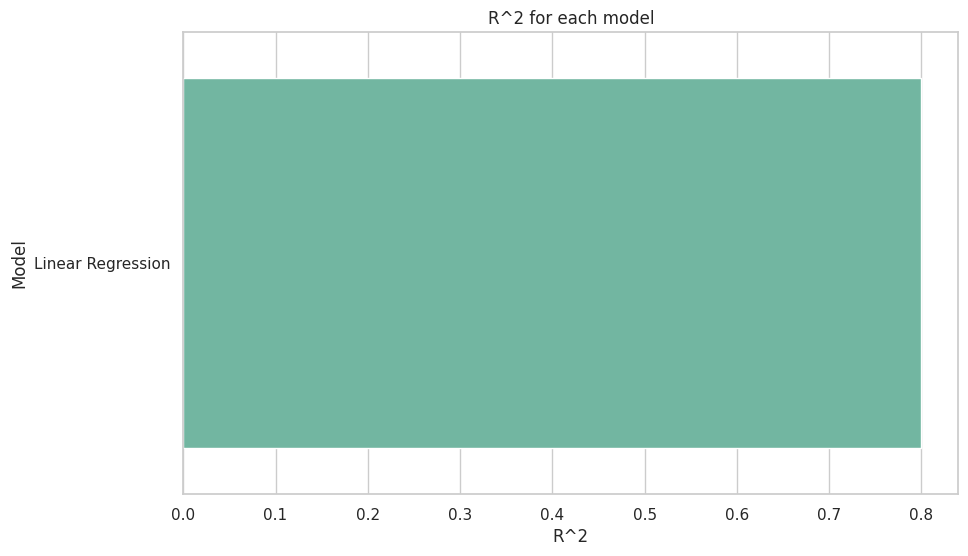

In [39]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.set_palette('Set2')
sns.set_style("whitegrid")
sns.barplot(x='R^2', y='Model', data=results_df)
plt.title('R^2 for each model')
plt.show()

Jika dilihat hasil visualisasi perbandingan R2, maka pada model random forest menghasilkan nilai R2 yang paling mendekati 1 dibandingkan dengan kedua model yang digunakan.

**Metrik RMSE**

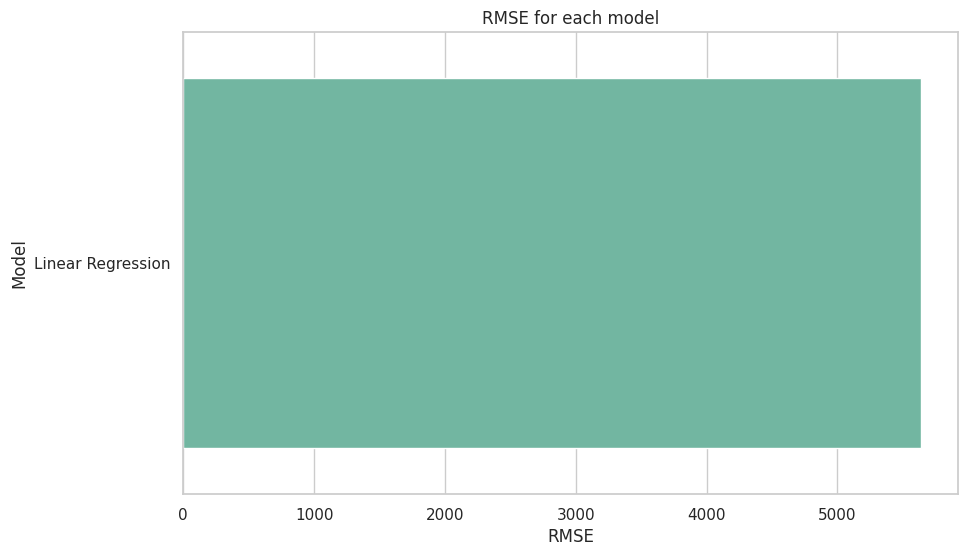

In [40]:
sns.barplot(x='RMSE', y='Model', data=results_df)
plt.title('RMSE for each model')
plt.show()

Untuk memastikan lebih lanjut maka dicoba untuk melakukan visualisasi RMSE yang dimana hasil dari RMSE  model random forest menghasilkan nilai yang kecil dibandingkan dengan kedua model lainnya dan ini membuktikan bahwa model random forest adalah model yang cocok untuk digunakan dalam kasus prediksi biaya asuransi.

**Validasi Fitur**

Feature importance ranking


1.smoker_no(0.356737)
2.smoker_yes(0.260869)
3.bmi(0.208093)
4.age(0.133713)
5.children(0.018740)
6.region_northwest(0.004852)
7.region_northeast(0.004646)
8.region_southeast(0.003621)
9.region_southwest(0.003035)
10.sex_male(0.002941)
11.sex_female(0.002752)


<BarContainer object of 11 artists>

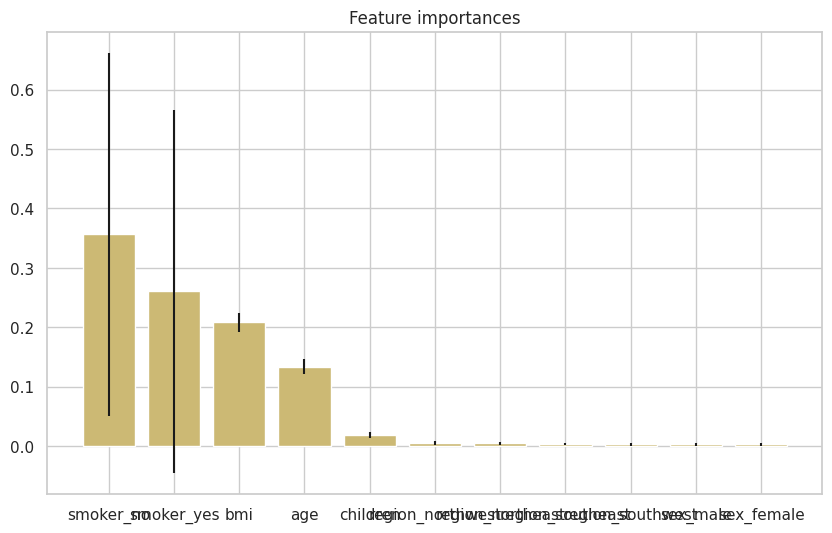

In [41]:
print('Feature importance ranking\n\n')
importances = for_reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in for_reg.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'bmi', 'children','smoker_no','smoker_yes','sex_female','sex_male','region_northeast','region_northwest','region_southeast','region_southwest']
importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

Jika dilihat dari hasil visualisasi diatas maka dapat ditarik sebuah kesimpulan bahwa fitur yang mempengaruhi biaya asuransi adalah `smoker, bmi dan age`. Selain dari fitur yang disebutkan, sangat kecil kemungkinan dalam mempengaruhi biaya asuransi yang harus dibayarkan.

**Prediksi**

In [42]:
#Predicting the charges
y_test_pred_poly = polynomial_model.predict(Xp_test)
y_test_pred_for = randomforest_model.predict(X_test)
y_test_pred_lin = lin_reg.predict(X_test)
#Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted Polynomial': y_test_pred_poly,'Predicted Random Forest': y_test_pred_for,'Predicted Linear Regression': y_test_pred_lin})
df

,Actual,Predicted Polynomial,Predicted Random Forest,Predicted Linear Regression
578,9724.53000,11298.763577,12521.366079,11169.927119
610,8547.69130,8126.982107,10883.798450,9486.709085
569,45702.02235,12378.938422,44379.348242,38181.123053
1034,12950.07120,9565.166467,14263.990393,16266.313289
198,9644.25250,-5525.750080,11314.516086,6914.648007
...,...,...,...,...
1084,15019.76005,10923.895939,15550.515121,14760.230968
726,6664.68595,7336.909876,6879.205600,8277.984346
1132,20709.02034,10242.755077,12482.242708,16149.973370
725,40932.42950,67814.549695,38809.909610,32904.758143


Hasil dari komparasi dari beberapa model yang digunakan, terbukti bahwa model Random Forest paling mendekati nilai sebenarnya (nilai aktual) sehingga model Random forestlah yang bisa dikatakan cocok dipakai.